In [11]:
# Import necessary libraries
import pandas as pd
from google.colab import files
import io

# Upload a file from your local system
uploaded = files.upload()

# Check if the file was uploaded successfully
if 'fraud_oracle.csv' in uploaded:
    data = pd.read_csv(io.BytesIO(uploaded['fraud_oracle.csv']))
    # Display the first few rows of the DataFrame
    print(data.head())
else:
    print("File 'fraud_oracle.csv' not found. Please check the file name and try uploading again.")


Saving fraud_oracle.csv to fraud_oracle (5).csv
File 'fraud_oracle.csv' not found. Please check the file name and try uploading again.


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
data = pd.read_csv('fraud_oracle (5).csv')  # Change this to your file's path

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Assuming 'FraudFound_P' is our target
target_column = 'FraudFound_P' if 'FraudFound_P' in data.columns else data.columns[-1]
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')


Accuracy: 0.5311284046692607
Precision: 0.8911127241550185
Recall: 0.5311284046692607
F1 Score: 0.6457632964076541


In [15]:
import pandas as pd

# load dataset into a DataFrame named 'data'
print(data.columns)


Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


In [18]:
y = data['FraudFound_P']  # fraud indicator variable


In [19]:
X = data.drop('FraudFound_P', axis=1)  # fraud indicator variable


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


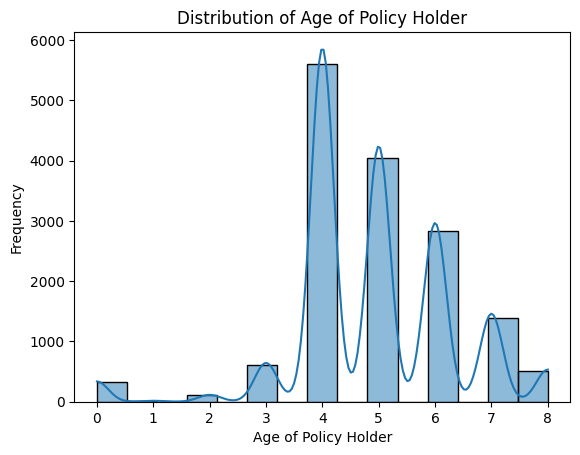

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'AgeOfPolicyHolder' is encoded and needs to be plotted
sns.histplot(data['AgeOfPolicyHolder'], kde=True, bins=15)
plt.title('Distribution of Age of Policy Holder')
plt.xlabel('Age of Policy Holder')
plt.ylabel('Frequency')
plt.show()


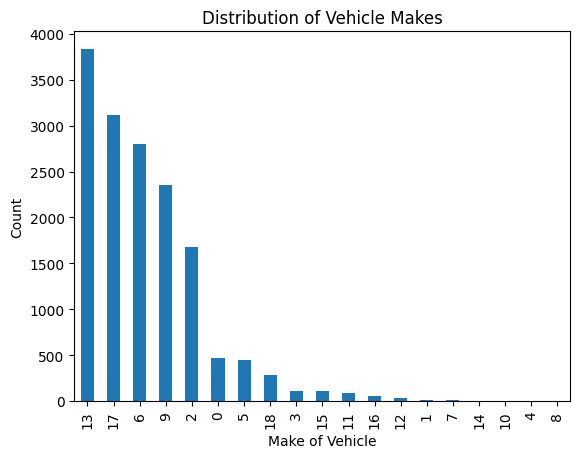

In [22]:
data['Make'].value_counts().plot(kind='bar')
plt.title('Distribution of Vehicle Makes')
plt.xlabel('Make of Vehicle')
plt.ylabel('Count')
plt.show()


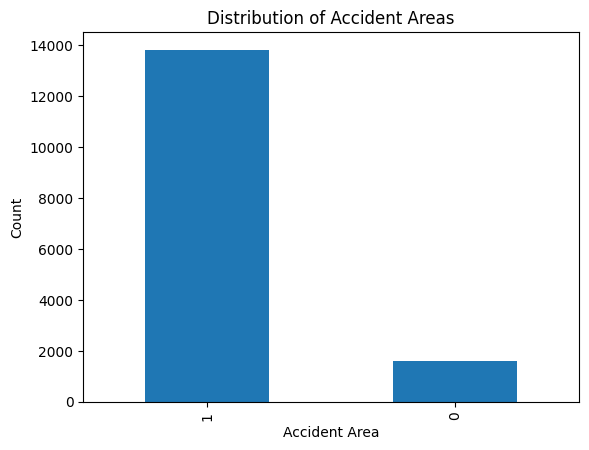

In [23]:
data['AccidentArea'].value_counts().plot(kind='bar')
plt.title('Distribution of Accident Areas')
plt.xlabel('Accident Area')
plt.ylabel('Count')
plt.show()


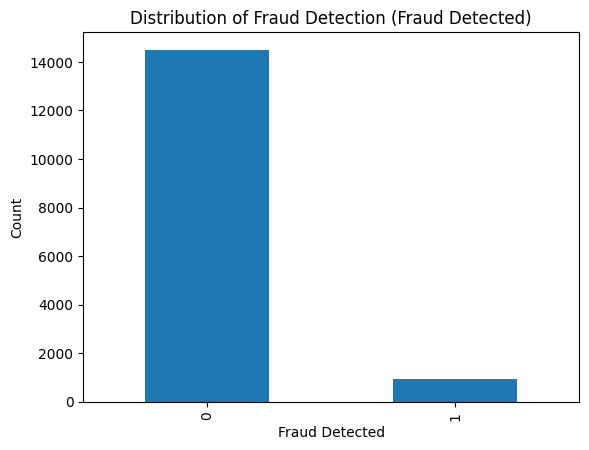

In [26]:
data['FraudFound_P'].value_counts().plot(kind='bar')  # target variable name
plt.title('Distribution of Fraud Detection (Fraud Detected)')
plt.xlabel('Fraud Detected')
plt.ylabel('Count')
plt.show()


In [27]:
#  Fill missing numerical values with the median
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# For categorical data, fill missing values with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [28]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])


In [29]:
from sklearn.model_selection import train_test_split

X = data.drop('FraudFound_P', axis=1)  # Replace 'FraudFound_P' with your target variable name
y = data['FraudFound_P']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.naive_bayes import MultinomialNB  # Or another appropriate variant

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.5311284046692607
Precision: 0.06907593778591034
Recall: 0.5298245614035088
F1 Score: 0.12221772561715903


In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(MultinomialNB(), parameters, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)


Best Parameters: {'alpha': 0.5}


In [34]:
model_optimized = MultinomialNB(alpha=best_parameters['alpha'])
model_optimized.fit(X_train, y_train)


MultinomialNB(alpha=0.5)

In [35]:
# Assuming `model` is your fitted Naïve Bayes model
print("Class Log Priors:\n", model.class_log_prior_)
print("\nFeature Log Probabilities:\n", model.feature_log_prob_)


Class Log Priors:
 [-0.06092576 -2.82840742]

Feature Log Probabilities:
 [[ -7.51960239  -8.21077043  -8.16856394  -6.92196087  -9.34375554
   -7.80127668  -7.34470506  -8.23847838  -9.41050362  -8.97067351
   -5.54818753 -10.5008297   -8.98888007 -10.11579503  -8.99396678
   -0.28132142  -7.1007487   -3.22618657  -8.32202098  -8.14072596
   -8.54772295  -8.86516958  -7.66648892  -7.64640956 -12.86377794
  -14.30331682 -13.33823592  -8.54441504  -8.17372209 -11.5366047
   -1.6380441   -9.1740655 ]
 [ -7.50479833  -8.1944773   -8.18414426  -6.90967201  -9.34581131
   -7.76562932  -7.31593578  -8.213115    -9.31349251  -8.92226252
   -5.55414307 -12.51659238  -9.28047475 -10.95160623  -8.65449061
   -0.2951838   -7.07285801  -3.18057365  -8.25452506  -8.09565862
   -8.50610213  -8.75236349  -7.64372102  -7.64805508 -13.01302926
  -14.26579223 -14.26579223  -8.48582062  -8.15100447 -11.54121273
   -1.59545112  -9.81727586]]


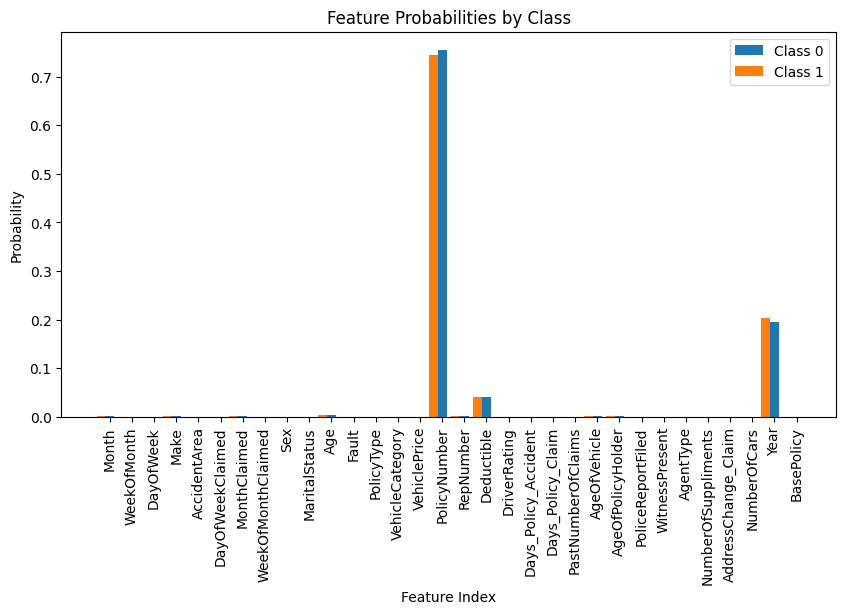

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Example for visualizing feature probabilities for a binary classification problem
feature_indexes = np.arange(len(X.columns))
plt.figure(figsize=(10, 5))
for i, class_label in enumerate(model.classes_):
    plt.bar(feature_indexes - 0.4*i, np.exp(model.feature_log_prob_[i]), width=0.4, label=f'Class {class_label}')

plt.xlabel('Feature Index')
plt.ylabel('Probability')
plt.title('Feature Probabilities by Class')
plt.xticks(ticks=feature_indexes, labels=X.columns, rotation=90)
plt.legend()
plt.show()


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assume y_test is your true labels and y_pred is the model's predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')


Accuracy: 0.5311284046692607
Precision: 0.06907593778591034
Recall: 0.5298245614035088
F1 Score: 0.12221772561715903


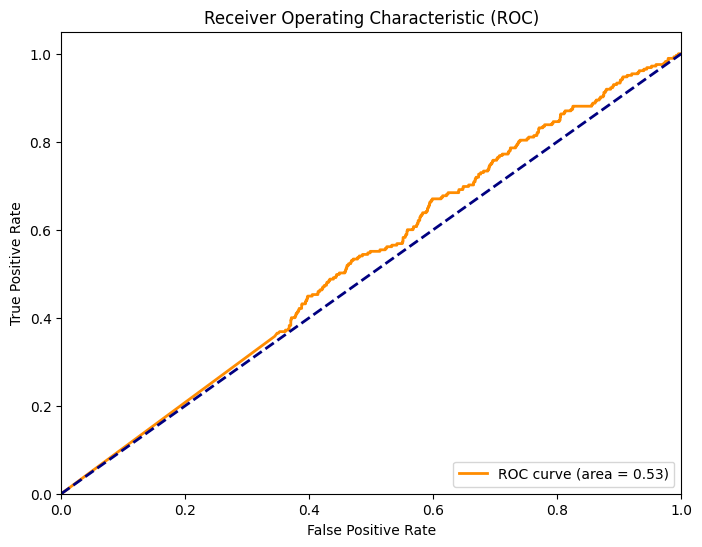

In [38]:
# Calculating ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
